In [81]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

## Question 6

In [82]:
data = pd.read_csv('Q4_HW2.csv')
data

,Type,Area,Condition
0,Trial 1,0.000300,Initial
1,Trial 1,0.000300,Initial
2,Trial 1,0.000300,Initial
3,Trial 1,0.000300,Initial
4,Trial 1,0.000300,Initial
...,...,...,...
1577,Trial 6,0.000066,2h
1578,Trial 6,0.000087,2h
1579,Trial 6,0.000101,2h
1580,Trial 6,0.000106,2h


In [83]:
model = ols('Area ~ C(Type) + C(Condition)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Type),0.000005,5.0,38.349960,3.099589e-37
C(Condition),0.000025,2.0,466.633663,7.444170e-160
Residual,0.000042,1574.0,NaN,NaN


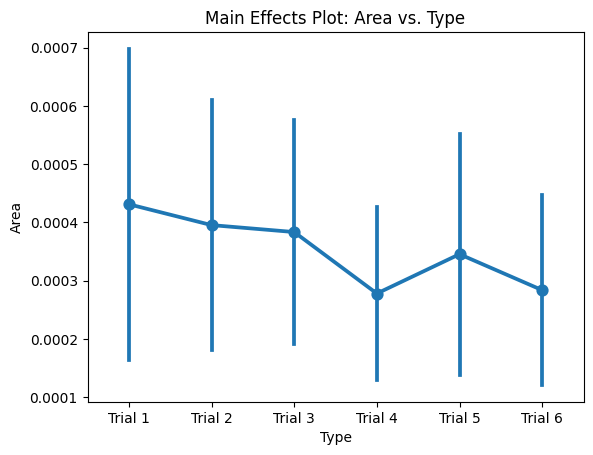

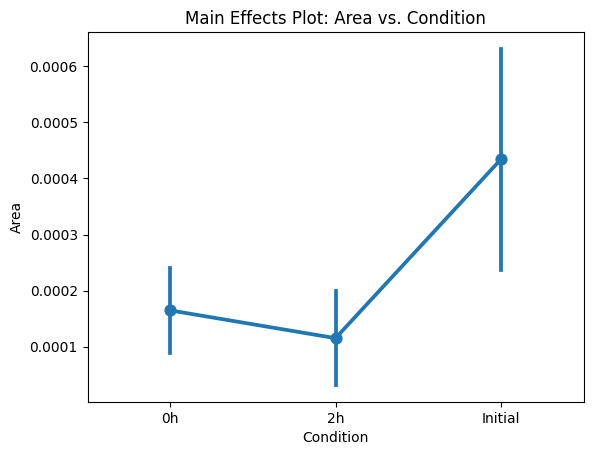

In [84]:
data['Type'] = data['Type'].astype('category')
data['Condition'] = data['Condition'].astype('category')

sns.pointplot(x='Type', y='Area', data=data, errorbar='sd', markers='o')
plt.title('Main Effects Plot: Area vs. Type')
plt.xlabel('Type')
plt.ylabel('Area')
plt.show()

sns.pointplot(x='Condition', y='Area', data=data, errorbar='sd', markers='o')
plt.title('Main Effects Plot: Area vs. Condition')
plt.xlabel('Condition')
plt.ylabel('Area')
plt.show()

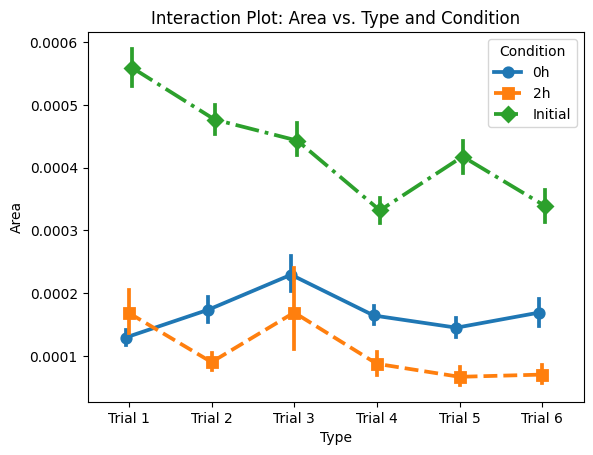

In [85]:
sns.pointplot(x='Type', y='Area', data=data,  hue='Condition', dodge=True,  markers=["o", "s", "D", "X"],linestyles=["-", "--", "-.", ":"])

plt.title('Interaction Plot: Area vs. Type and Condition')
plt.xlabel('Type')
plt.ylabel('Area')

plt.show()

## Question 7

In [86]:
data = pd.read_csv('Q5_HW2.csv')
data = data.rename(columns={'yield':'yield_value'})
data.head()

,density,block,fertilizer,yield_value
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [87]:
model = ols('yield_value ~ density', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(f'One-Way Anova Density as a factor: \n{anova_table}')

One-Way Anova Density as a factor: 
             sum_sq    df          F    PR(>F)
density    5.121681   1.0  13.070993  0.000485
Residual  36.832552  94.0        NaN       NaN


In [88]:
model = ols('yield_value ~ block', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(f'One-Way Anova Block as a factor: \n{anova_table}')

One-Way Anova Block as a factor: 
             sum_sq    df         F    PR(>F)
block      0.150933   1.0  0.339391  0.561576
Residual  41.803300  94.0       NaN       NaN


In [89]:
model = ols('yield_value ~ fertilizer', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(f'One-Way Anova fertilizer as a factor: \n{anova_table}')

One-Way Anova fertilizer as a factor: 
               sum_sq    df          F    PR(>F)
fertilizer   5.743223   1.0  14.908808  0.000207
Residual    36.211009  94.0        NaN       NaN


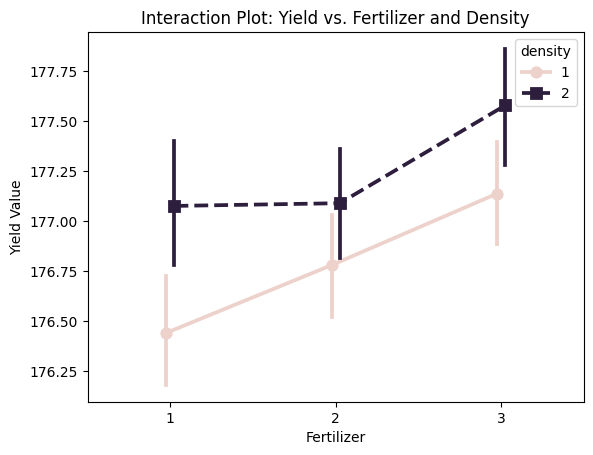

In [90]:
sns.pointplot(x='fertilizer', y='yield_value', data=data,  hue='density', dodge=True,  markers=["o", "s", "D", "X"],linestyles=["-", "--", "-.", ":"])

plt.title('Interaction Plot: Yield vs. Fertilizer and Density')
plt.xlabel('Fertilizer')
plt.ylabel('Yield Value')

plt.show()

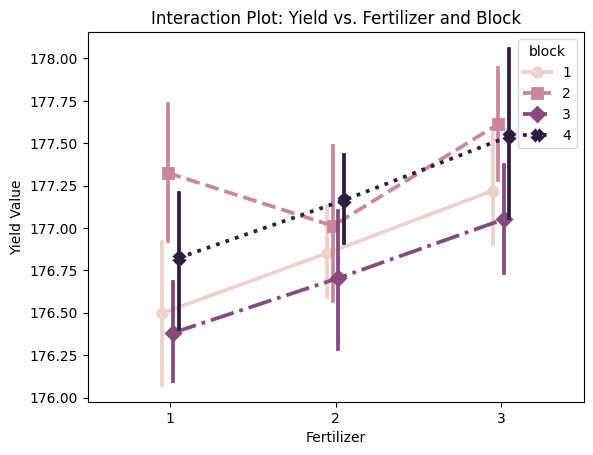

In [91]:
sns.pointplot(x='fertilizer', y='yield_value', data=data,  hue='block', dodge=True,  markers=["o", "s", "D", "X"],linestyles=["-", "--", "-.", ":"])

plt.title('Interaction Plot: Yield vs. Fertilizer and Block')
plt.xlabel('Fertilizer')
plt.ylabel('Yield Value')

plt.show()

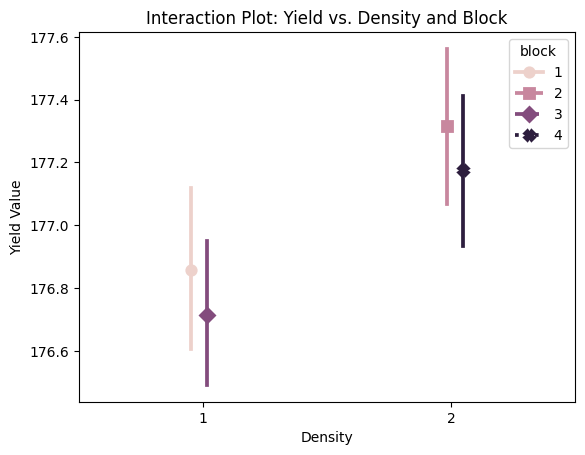

In [92]:
sns.pointplot(x='density', y='yield_value', data=data,  hue='block', dodge=True,  markers=["o", "s", "D", "X"],linestyles=["-", "--", "-.", ":"])

plt.title('Interaction Plot: Yield vs. Density and Block')
plt.xlabel('Density')
plt.ylabel('Yield Value')

plt.show()

## Question 8

In [93]:
model = ols('yield_value ~ block + density + fertilizer', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(f'Three-Way Anova Block as a factor: \n{anova_table}')

Three-Way Anova Block as a factor: 
               sum_sq    df          F    PR(>F)
block        0.486088   1.0   1.461285  0.229823
density      5.456836   1.0  16.404437  0.000107
fertilizer   5.743223   1.0  17.265379  0.000073
Residual    30.603241  92.0        NaN       NaN


This means that the density and fertiizer have statistical significance on the yield variable whereas block have no significance on the yield variable. 